In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [144]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [141]:
#look for misentered non-numeric values
for column_name in list(life_df.columns[3:]):
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in life_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Life expectancy 
These are the problematic values for the variable: Adult Mortality
These are the problematic values for the variable: infant deaths
These are the problematic values for the variable: Alcohol
These are the problematic values for the variable: percentage expenditure
These are the problematic values for the variable: Hepatitis B
These are the problematic values for the variable: Measles 
These are the problematic values for the variable:  BMI 
These are the problematic values for the variable: under-five deaths 
These are the problematic values for the variable: Polio
These are the problematic values for the variable: Total expenditure
These are the problematic values for the variable: Diphtheria 
These are the problematic values for the variable:  HIV/AIDS
These are the problematic values for the variable: GDP
These are the problematic values for the variable: Population
These are the problematic values for the variable:

all good! Now check NaNs:

In [142]:
nanless_df = life_df.dropna()
nanless_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


If I drop all rows with NaN I lose almost 44% of the data (1,649 down from 2,938), so I'll use interpolation to fill in missing values because the variables are time-dependent. 

In [172]:
for column in life_df.columns[3:]:
    life_df.loc[:, column].interpolate(inplace=True)
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,2419.592240,38.29869,42.035739,82.474643,5.940955,82.246086,1.742103,7432.027910,1.229209e+07,4.882301,4.920439,0.634458,12.076804
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,11467.272489,19.99140,160.445548,23.420689,2.445751,23.705664,5.077785,13410.150286,5.471908e+07,4.433359,4.532488,0.209574,3.342316
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


There are 18 variables that could affect life expectancy. Most are non-normal distributions, and they vary in magnitude from billions (population) to single-digits (Alcohol). Before looking for outliers, creating a correlation matrix, and selecting features, I'll normalize and standardize the data for analysis. 

In [173]:
from sklearn.preprocessing import normalize, scale

for column in life_df.columns[3:]:
    life_df[column] =  normalize(np.array(life_df[column]).reshape(1,-1)).reshape(-1,1)

for column in life_df.columns[3:]:
    life_df[column] = scale(life_df[column])

In [146]:
#detect outliers using z-score threshold of 2
from scipy.stats import zscore

for column in life_df.columns[3:]:
    z_scores = zscore(life_df[column])

for threshold in range(2,4):
        print("The score threshold is: {}".format(threshold))
        print("The indices of the outliers:")
        print(np.where(z_scores > threshold))
        print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 2
The indices of the outliers:
(array([ 113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  252,  254,  734,  735,  736,  737,
        738, 1171, 1172, 1173, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856]),)
Number of outliers is: 37
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


There are only 37 values with a z-score higher than 2, and none higher than 3. 

Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

In [174]:
life_df[['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 
         'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 
         'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', 
         ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 
         ' thinness 5-9 years', 'Income composition of resources', 'Schooling']].corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.695730,-0.196197,0.400068,0.382069,0.247419,-0.157298,0.556433,-0.222151,0.459865,0.210843,0.474084,-0.555929,0.435854,-0.007126,-0.476809,-0.472485,0.690071,0.703409
Adult Mortality,-0.695730,1.000000,0.078762,-0.194070,-0.242587,-0.162578,0.031226,-0.383224,0.094134,-0.272553,-0.116293,-0.273311,0.523245,-0.283332,-0.025440,0.307734,0.314769,-0.440536,-0.430481
infant deaths,-0.196197,0.078762,1.000000,-0.114836,-0.085612,-0.200825,0.501128,-0.226540,0.996629,-0.169385,-0.126114,-0.173944,0.025231,-0.107450,0.538589,0.462953,0.467439,-0.132327,-0.173790
Alcohol,0.400068,-0.194070,-0.114836,1.000000,0.337902,0.092366,-0.050497,0.319618,-0.112036,0.222830,0.289631,0.218683,-0.048190,0.342275,-0.029223,-0.420123,-0.408260,0.442169,0.507064
percentage expenditure,0.382069,-0.242587,-0.085612,0.337902,1.000000,-0.033524,-0.056596,0.228084,-0.087852,0.147584,0.169770,0.144017,-0.097857,0.871453,-0.016310,-0.252133,-0.253622,0.359488,0.369717
Hepatitis B,0.247419,-0.162578,-0.200825,0.092366,-0.033524,1.000000,-0.129531,0.172639,-0.208634,0.446056,0.088999,0.532925,-0.117155,0.031839,-0.080645,-0.141744,-0.150593,0.193478,0.201451
Measles,-0.157298,0.031226,0.501128,-0.050497,-0.056596,-0.129531,1.000000,-0.175347,0.507809,-0.135067,-0.102920,-0.140774,0.030899,-0.067382,0.229798,0.222427,0.217983,-0.087650,-0.082928
BMI,0.556433,-0.383224,-0.226540,0.319618,0.228084,0.172639,-0.175347,1.000000,-0.236850,0.282080,0.233848,0.280483,-0.243181,0.271717,-0.060964,-0.533952,-0.540459,0.461457,0.488210
under-five deaths,-0.222151,0.094134,0.996629,-0.112036,-0.087852,-0.208634,0.507809,-0.236850,1.000000,-0.187343,-0.127707,-0.194375,0.038062,-0.110803,0.526147,0.465291,0.468655,-0.149759,-0.188784
Polio,0.459865,-0.272553,-0.169385,0.222830,0.147584,0.446056,-0.135067,0.282080,-0.187343,1.000000,0.130634,0.675339,-0.158214,0.196090,-0.028359,-0.224021,-0.225768,0.360154,0.382657


Several of the values seem irrelevant or redundant, and this is borne out by the standard-normalized correlation matrix.

Population is irrelevant (r = 0.007) and can be discarded

Total expenditure is just a less relevant subset of percentage expenditure. 

The pairs:
"thinness 1-19 years" and "thinness 5-9 years",
"Schooling" and "Income composition of resources",
"Polio" and "Diphtheria", and
"infant deaths" & "under-five deaths" are redundant, and show similar correlations to all features




In [203]:
life_features_df = life_df.drop(["infant deaths", "Polio", "Population", " thinness 5-9 years", "Income composition of resources"], axis=1)

from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=1)

X = life_features_df[['Adult Mortality', 'Alcohol', 
         'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 
         'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', 'GDP', 
         ' thinness  1-19 years', 'Schooling']]


life_features_df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by the first',
    'component of Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by the first component of Sklearn PCA.
 [0.31952]


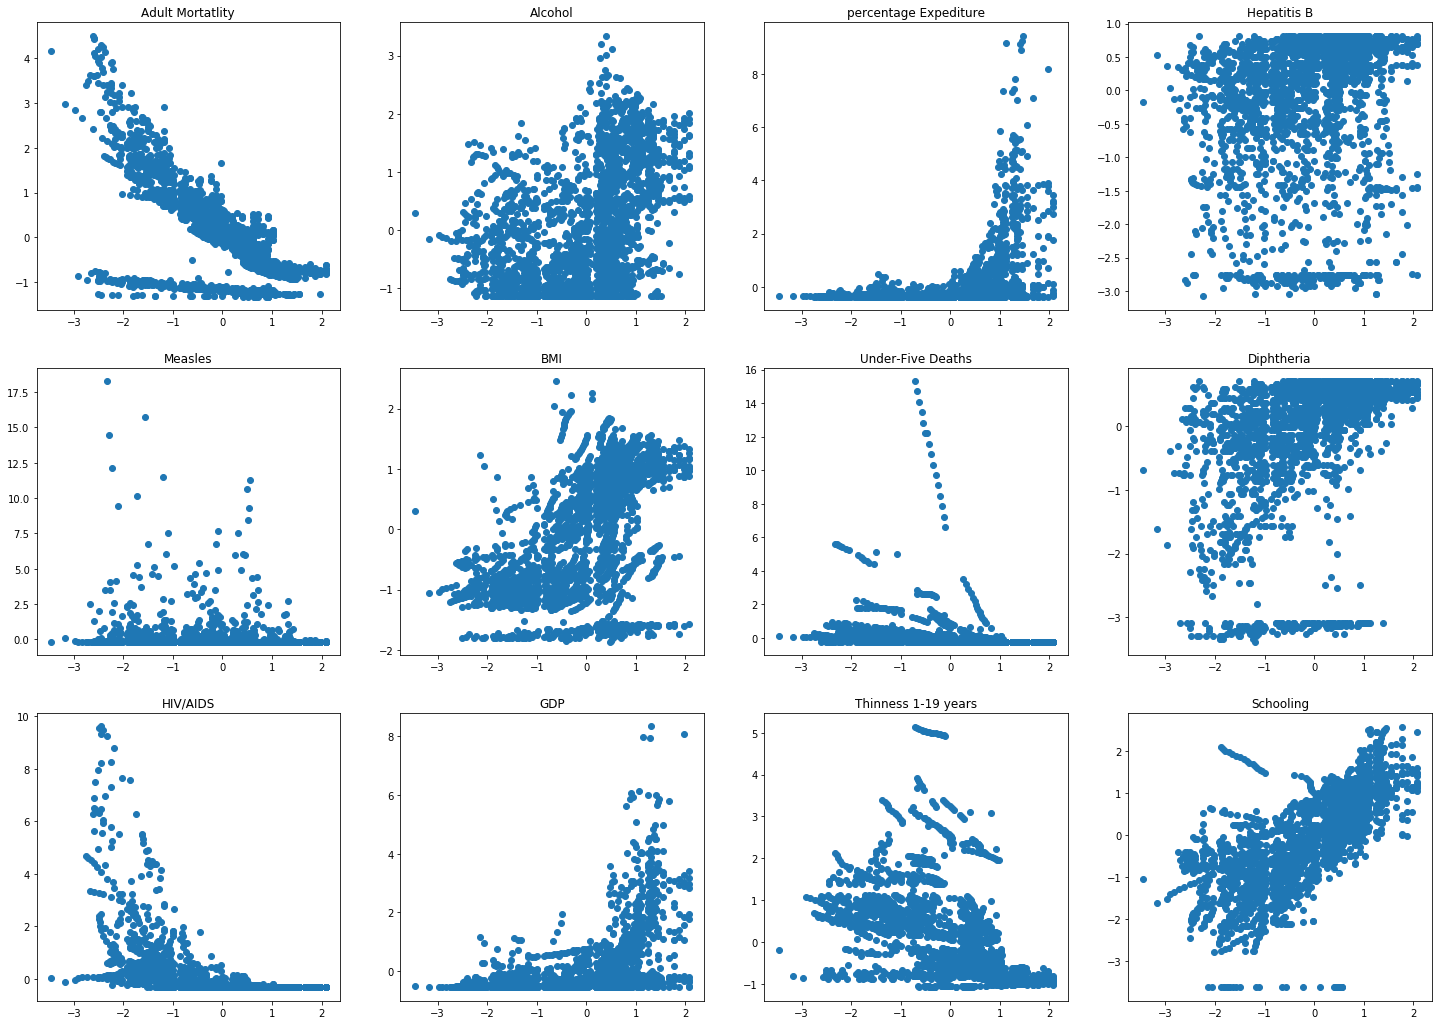

In [215]:
plt.figure(figsize=(25,18))
plt.subplot(3,4,1)
plt.scatter(life_features_df['Life expectancy '], life_features_df['Adult Mortality'])
plt.title("Adult Mortatlity")

plt.subplot(3,4,2)
plt.scatter(life_features_df['Life expectancy '], life_features_df['Alcohol'])
plt.title("Alcohol")

plt.subplot(3,4,3)
plt.scatter(life_features_df['Life expectancy '], life_features_df['percentage expenditure'])
plt.title("percentage Expediture")

plt.subplot(3,4,4)
plt.scatter(life_features_df['Life expectancy '], life_features_df['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(3,4,5)
plt.scatter(life_features_df['Life expectancy '], life_features_df['Measles '])
plt.title("Measles")

plt.subplot(3,4,6)
plt.scatter(life_features_df['Life expectancy '], life_features_df[' BMI '])
plt.title("BMI")

plt.subplot(3,4,7)
plt.scatter(life_features_df['Life expectancy '], life_features_df['under-five deaths '])
plt.title("Under-Five Deaths")

plt.subplot(3,4,8)
plt.scatter(life_features_df['Life expectancy '], life_features_df['Diphtheria '])
plt.title("Diphtheria")

plt.subplot(3,4,9)
plt.scatter(life_features_df['Life expectancy '], life_features_df[' HIV/AIDS'])
plt.title("HIV/AIDS")

plt.subplot(3,4,10)
plt.scatter(life_features_df['Life expectancy '], life_features_df['GDP'])
plt.title("GDP")

plt.subplot(3,4,11)
plt.scatter(life_features_df['Life expectancy '], life_features_df[' thinness  1-19 years'])
plt.title("Thinness 1-19 years")

plt.subplot(3,4,12)
plt.scatter(life_features_df['Life expectancy '], life_features_df['Schooling'])
plt.title("Schooling")
plt.show()

Here are the twelve features that best describe the model for life expectancy. There are a few things to notice about these plots. Many have lines or 'runs' in the data, which are a result of the interpolation algorithm that generated a linear series of values between two data points. The standardization & normalization also caused many of the positive-only vlaues to cluster around zero. Of all the features, Schooling and Adult Mortality were the best predictors of Life expectancy (both r = 0.7), and most were better than the first component of the PCA (r = 0.31). 